In [1]:
# ignoring any warning
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# import the desired libraries:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [5]:
crime = pd.read_csv('US_violent_crime.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
# check shape 
crime.shape

(50, 5)

In [7]:
# Check some facts
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
# Check some stats summary
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## Check missing values

In [9]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

**Nice no missing values !**

## Preprocessing

In [10]:
# Renaming the column as Unnmaed doesn't make sense. to State
crime = crime.rename(columns= {'Unnamed: 0': 'State'})
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Exploratory Data Analysis

## 1- Murder Rate

<AxesSubplot:xlabel='State'>

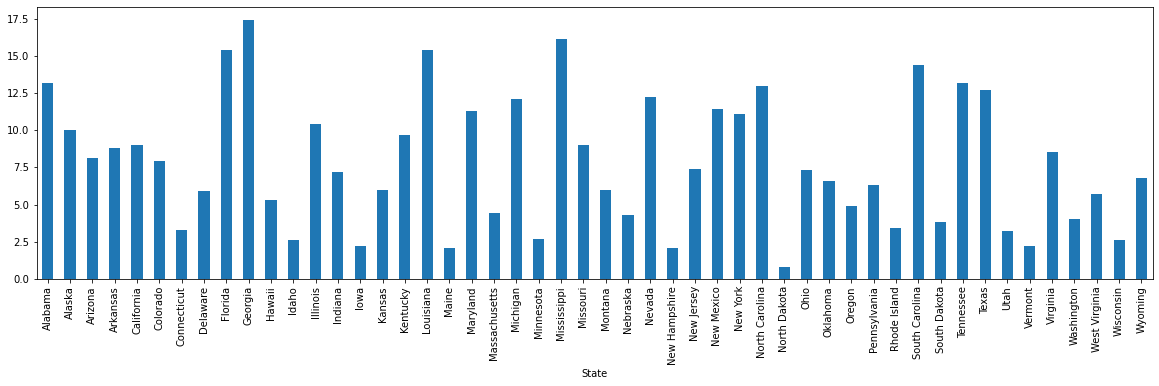

In [11]:
plt.figure(figsize= (20, 5))
crime.groupby('State')['Murder'].max().plot(kind= 'bar')

### *Observations*:

* Highest Murder Rate : Georgia and Missisippi
* Lowest Murder Rate : Idaho , Iowa, Maine, New Hampshire, North Dakota, Vermont and Wisconsin.

## 2) Assault Rate

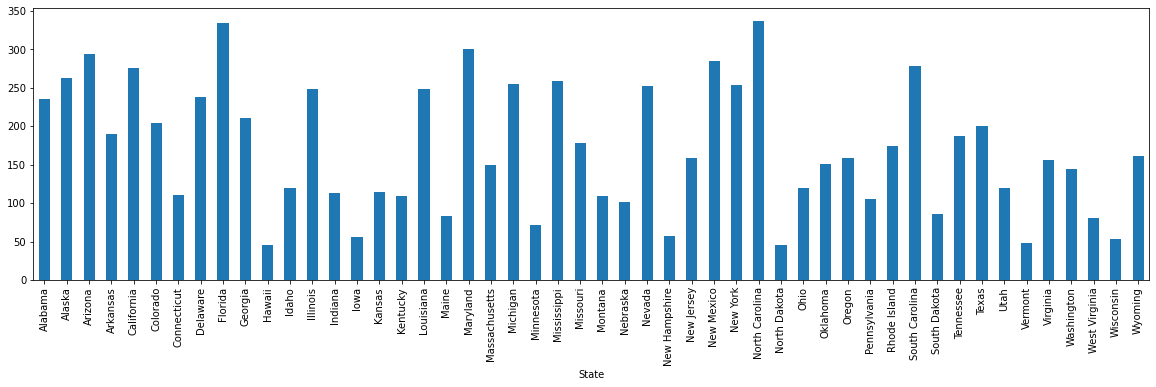

In [13]:
plt.figure(figsize= (20, 5))
crime.groupby('State')['Assault'].max().plot(kind= 'bar');

### *Observations*:

* Highest Assualt Rate : Florida and North California.
* Lowest Assualt Rate : Hawaii, North Dakota, Vermont , New Hampshire and Wisconsin.

## 3) Rape Rate

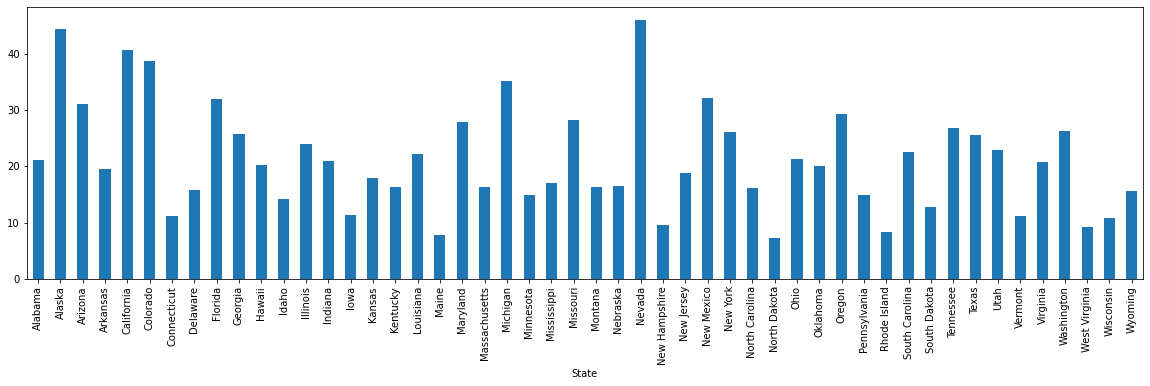

In [16]:
plt.figure(figsize= (20, 5))
crime.groupby('State')['Rape'].max().plot(kind= 'bar');

### *Observations*:

* Highest Rape Rate : Nevada and Alaska.
* Lowest Rape Rate  : Maine, North Dakota,Vermont,Connecticut,New Hampshire, Wisconsin,Rhode Island and West Virginia

## 4) UrbanPop Rate

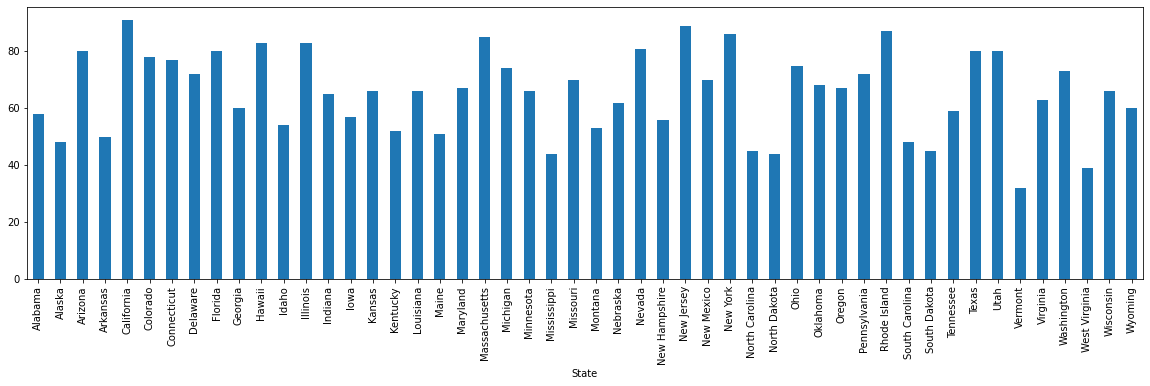

In [18]:
plt.figure(figsize= (20, 5))
crime.groupby('State')['UrbanPop'].max().plot(kind='bar');

### crime.iloc[:, 1:]*Observation*: 
* Highest Urban Population : California, New Jersey
* Lowest Urban Population : Vermont, West Virginia

In [20]:
# Specify data without State Column
data = crime.iloc[:, 1:].values

In [21]:
# Scale our data
scaled_data = scaler.fit_transform(data)

# Type of Linkages:
## 1) Single Leakage:
The distance between 2 clusters is defined as the shortest distance between points in the two clusters

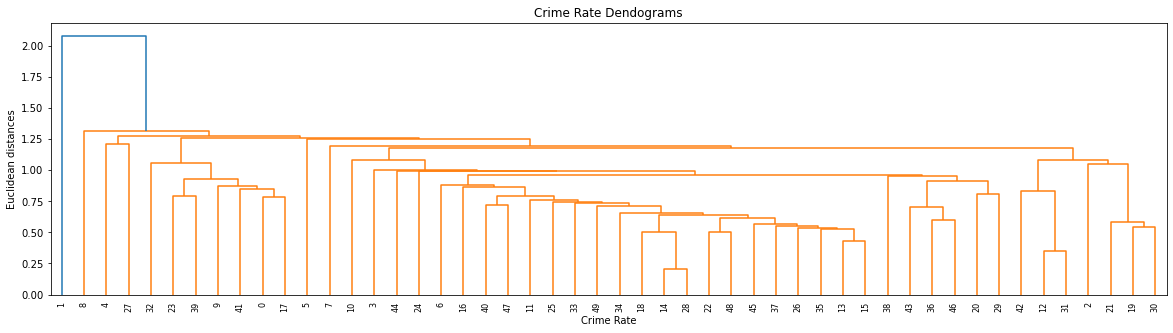

In [24]:
plt.figure(figsize= (20, 5))
plt.title('Crime Rate Dendograms')
dend = sch.dendrogram(sch.linkage(scaled_data, method= 'single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances');

The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters.

## 2) Complete Linkage:
The distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

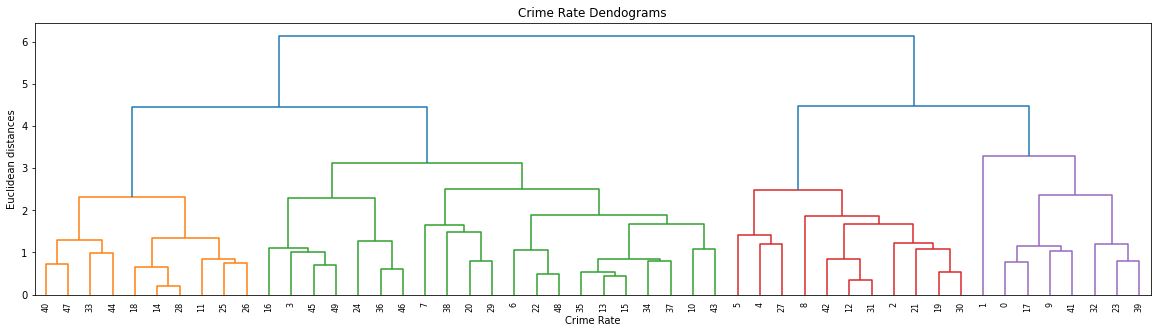

In [25]:
plt.figure(figsize= (20, 5))
plt.title('Crime Rate Dendograms')
dend = sch.dendrogram(sch.linkage(scaled_data, method= 'complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances');

## 3) Average Linkage:
The distance between 2 clusters is defined as the average distance between every point of one cluster to every other point of the other cluster.

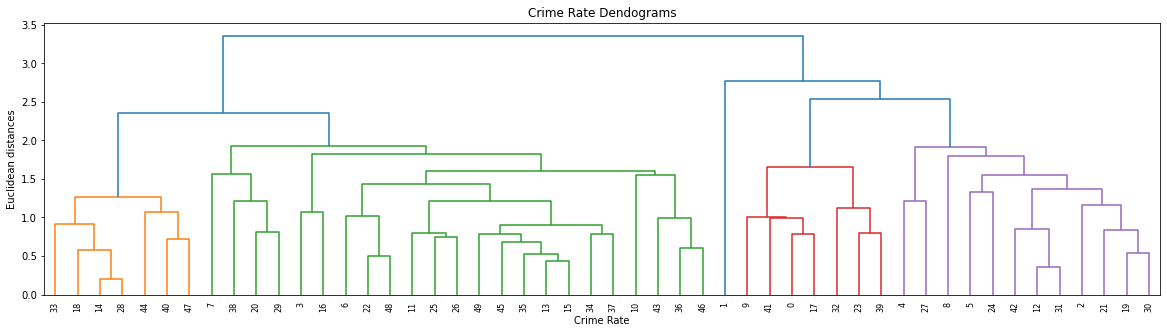

In [26]:
plt.figure(figsize= (20, 5))
plt.title('Crime Rate Dendograms')
dend = sch.dendrogram(sch.linkage(scaled_data, method= 'average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances');

### Notice
The single linkage type will produce dendrograms which are not structured properly, whereas complete or average linkage will produce clusters which have a proper tree-like structure.

## Ward Method

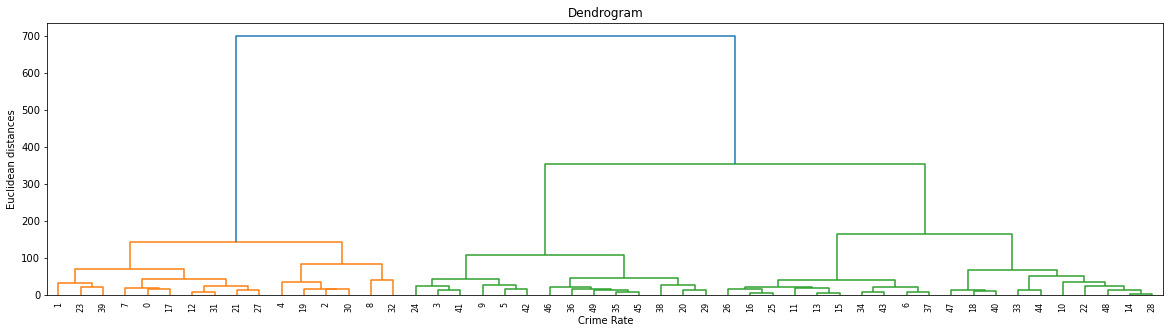

In [31]:
plt.figure(figsize= (20,5))
dendro = sch.dendrogram(sch.linkage(data
                                    , method= 'ward'))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

### How do we determine the optimal number of clusters from this diagram?
We look for the largest distance that we can vertically without crossing any horizontal line and this one is the red framed line on the above diagram. Let’s count the number of lines on the diagram and determine the optimal number of clusters. Cluster number will be 3 for this dataset.

In [32]:
# Fit the Agglomerative Clustering
AC = AgglomerativeClustering(n_clusters= 3, affinity= 'euclidean', linkage= 'ward')

### **Ward** method 
It is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss(within-cluster sums of squares) to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

In [34]:
# Fit and predict to have the cluster labels.
y_pred = AC.fit_predict(data)
y_pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [35]:
# Fetch the cluster labels
crime['cluster_labels'] = y_pred

In [37]:
# See which state falls in which cluster
crime[['State', 'cluster_labels']].head(10)

,State,cluster_labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


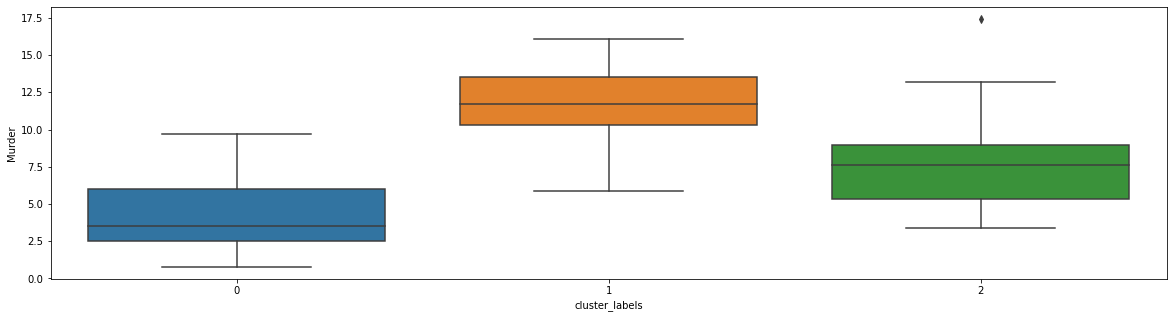

In [39]:
# Visualize clusters vs. Murder 
plt.figure(figsize= (20,5))
sns.boxplot('cluster_labels', 'Murder', data = crime);

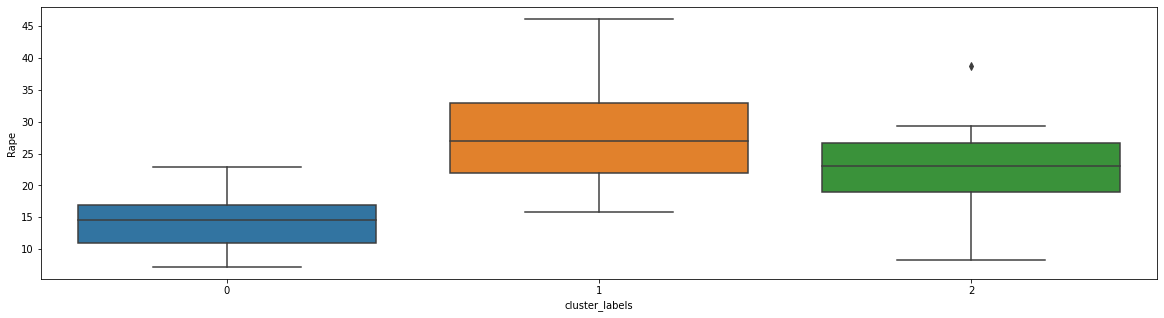

In [40]:
# Visualize clusters vs. Rape 
plt.figure(figsize= (20,5))
sns.boxplot('cluster_labels', 'Rape', data = crime);

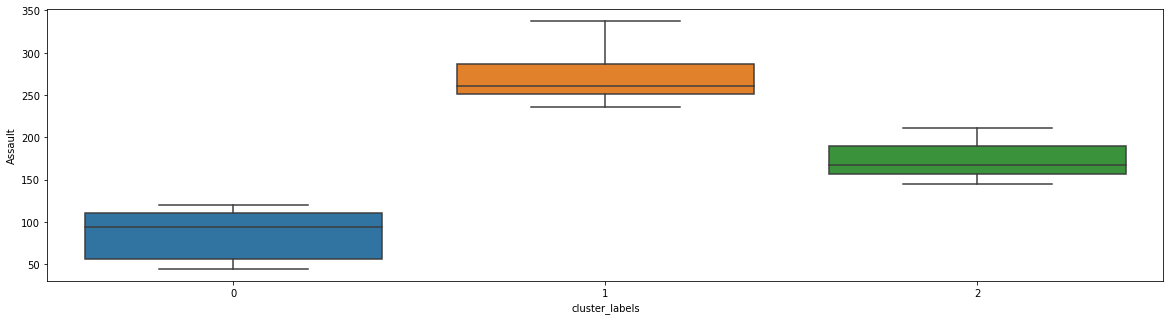

In [41]:
# Visualize clusters vs. Assault 
plt.figure(figsize= (20,5))
sns.boxplot('cluster_labels', 'Assault', data = crime);

## **Observations**:

* The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
* The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.
* The Cities in Cluster-3 seems to have moderate crime rates when compared to other zones and can be called as Moderate-Zone

In [43]:
# Display the cities in each zone now!
Safe_Zone= crime.groupby('cluster_labels')['State'].unique()[0]
Safe_Zone

array(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania',
       'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [44]:
Danger_Zone= crime.groupby('cluster_labels')['State'].unique()[1]
Danger_Zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware',
       'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
       'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina'], dtype=object)

In [45]:
Moderate_Zone= crime.groupby('cluster_labels')['State'].unique()[2]
Moderate_Zone

array(['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri',
       'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee',
       'Texas', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

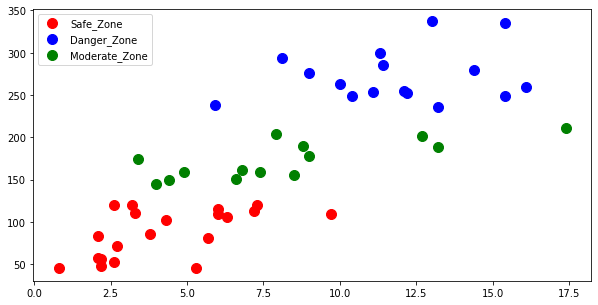

In [48]:
# Creating a scatter plot based on the danger level clusters of the cities
plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='red', label ='Safe_Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='blue', label ='Danger_Zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='green', label ='Moderate_Zone')
plt.legend()
plt.show()
